# House  Pic Detection Model

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import Cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [41]:
with_house_files = os.listdir(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\DEEP LEARNING\Face Mask Detection Using Convolutional Neural Network\pictures_data\house')


In [42]:
without_house_files = os.listdir(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\DEEP LEARNING\Face Mask Detection Using Convolutional Neural Network\pictures_data\not_house')

In [43]:
print('number of images with house ', len(with_house_files))
print('number of images without house ', len(without_house_files))

number of images with house  152
number of images without house  152


### creating labels for the two class of images
### With house -> 1
### Without house -> 0

In [44]:
# Creating labels
with_house_files_labels = [1]*152
without_house_files_labels = [0] * 152

In [45]:
print(with_house_files_labels[0:5])
print(without_house_files_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [46]:
# Combine the labels
labels = with_house_files_labels + without_house_files_labels

In [47]:
print(len(labels))

304


In [48]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


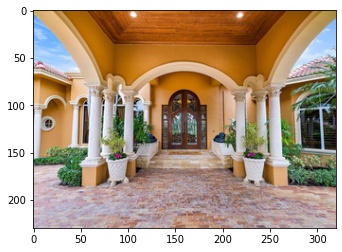

In [49]:
# display with-house images
img = mpimg.imread(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\DEEP LEARNING\Face Mask Detection Using Convolutional Neural Network\pictures_data\house\genBcs.RX-10847482_16_4.jpg')
imgplot = plt.imshow(img)
plt.show()

### Image processing

### 1. Resize the images

### 2. Convert the images to numpy arrays

In [50]:
with_house_files

['genBcs.RX-10847482_100_4.jpg',
 'genBcs.RX-10847482_102_4.jpg',
 'genBcs.RX-10847482_103_4.jpg',
 'genBcs.RX-10847482_105_4.jpg',
 'genBcs.RX-10847482_106_4.jpg',
 'genBcs.RX-10847482_108_4.jpg',
 'genBcs.RX-10847482_109_4.jpg',
 'genBcs.RX-10847482_10_4.jpg',
 'genBcs.RX-10847482_111_4.jpg',
 'genBcs.RX-10847482_112_4.jpg',
 'genBcs.RX-10847482_114_4.jpg',
 'genBcs.RX-10847482_115_4.jpg',
 'genBcs.RX-10847482_117_4.jpg',
 'genBcs.RX-10847482_118_4.jpg',
 'genBcs.RX-10847482_120_4.jpg',
 'genBcs.RX-10847482_121_4.jpg',
 'genBcs.RX-10847482_123_4.jpg',
 'genBcs.RX-10847482_124_4.jpg',
 'genBcs.RX-10847482_126_4.jpg',
 'genBcs.RX-10847482_127_4.jpg',
 'genBcs.RX-10847482_129_4.jpg',
 'genBcs.RX-10847482_12_4.jpg',
 'genBcs.RX-10847482_130_4.jpg',
 'genBcs.RX-10847482_132_4.jpg',
 'genBcs.RX-10847482_133_3.jpg',
 'genBcs.RX-10847482_13_4.jpg',
 'genBcs.RX-10847482_15_4.jpg',
 'genBcs.RX-10847482_16_4.jpg',
 'genBcs.RX-10847482_18_4.jpg',
 'genBcs.RX-10847482_19_4.jpg',
 'genBcs.RX-10847

In [34]:
with_house_path = 'C:/Users/Scofield/MACHINE LEARNING PROJECTS/DEEP LEARNING/Face Mask Detection Using Convolutional Neural Network/pictures_data/house/'

data = [ ]

for image_file in with_house_files:
    
    image = Image.open(with_house_path + str(image_file))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
    
    
without_house_path = 'C:/Users/Scofield/MACHINE LEARNING PROJECTS/DEEP LEARNING/Face Mask Detection Using Convolutional Neural Network/pictures_data/not_house/'

for image_file in without_house_files:
    
    image = Image.open(without_house_path + str(image_file))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)    

In [51]:
type(data)
len(data)

304

In [52]:
# Converting label and image lists to numpy arrays

X = np.array(data)

Y = np.array(labels)

In [53]:
print(X.shape)

(304, 128, 128, 3)


In [54]:
print(Y.shape)

(304,)


### Train test split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

### Scaling the data
#### We Since all image array values(pixels) lie between 0 - 255, we divide them by
#### 255. If the pixel is 255, then the color is white. If 0, then it is black


In [56]:
scaled_X_train = X_train/ 255

scaled_X_test = X_test / 255

### Building a Convolutional Neural Networks (CNN)

In [57]:
import tensorflow as tf
from tensorflow import keras

In [58]:
number_of_class_images = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape= (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_class_images, activation = 'sigmoid'))

In [59]:
# Compile the neural network

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [69]:
# Training the neural network
history = model.fit(scaled_X_train, Y_train, validation_split = 0.1, epochs = 25)

Epoch 1/25
7/7 [==============================] - 7s 985ms/step - loss: 0.0501 - acc: 0.9817 - val_loss: 0.0818 - val_acc: 0.9600
Epoch 2/25
7/7 [==============================] - 7s 968ms/step - loss: 0.0489 - acc: 0.9862 - val_loss: 0.0759 - val_acc: 0.9600
Epoch 3/25
7/7 [==============================] - 7s 958ms/step - loss: 0.0271 - acc: 0.9908 - val_loss: 0.0477 - val_acc: 0.9600
Epoch 4/25
7/7 [==============================] - 7s 969ms/step - loss: 0.0407 - acc: 0.9817 - val_loss: 0.3170 - val_acc: 0.8800
Epoch 5/25
7/7 [==============================] - 7s 974ms/step - loss: 0.0340 - acc: 0.9862 - val_loss: 0.0359 - val_acc: 1.0000
Epoch 6/25
7/7 [==============================] - 7s 956ms/step - loss: 0.0352 - acc: 0.9862 - val_loss: 0.1374 - val_acc: 0.9600
Epoch 7/25
7/7 [==============================] - 7s 962ms/step - loss: 0.0290 - acc: 0.9908 - val_loss: 0.0550 - val_acc: 0.9600
Epoch 8/25
7/7 [==============================] - 7s 963ms/step - loss: 0.0279 - acc: 1.00

In [71]:
loss, accuracy = model.evaluate(scaled_X_test, Y_test)

print('Test Accuracy = ', accuracy)

2/2 [==============================] - 1s 235ms/step - loss: 0.7364 - acc: 0.8525
Test Accuracy =  0.8524590134620667


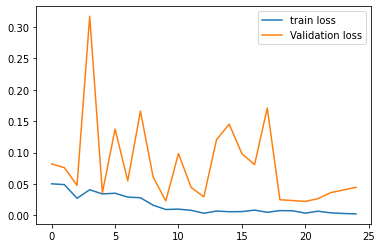

In [72]:
h = history
# Plot the loss values
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

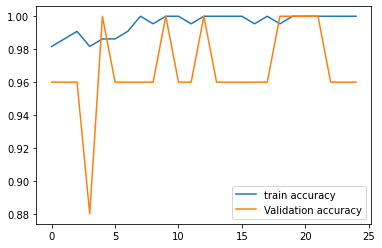

In [73]:
# Plot the accuracy values
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'Validation accuracy')
plt.legend()
plt.show()

### Pedictive system

input_image_path = input (' Path of the image to be predicted ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

resized_input_image = cv2.resize(input_image, (128,128))

scaled_input_image = resized_input_image / 255

reshaped_input_image = np.reshape(scaled_input_image, [1,128,128,3])

input_prediction = model.predict(reshaped_input_image)

print(input_prediction)


input_prediction_label = np.argmax(input_prediction)

print(input_prediction_label)


if input_prediction_label == 1:
    print('The image is House')
    
    
else:
    print('The image is NOT a House')